In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import scipy.optimize as so

In [17]:

def func(x, a, b, c, d):
    return a/(1+np.exp((x-b)/c)) + d

def get_fwhm_val(image_edge):
    """ Get the FWHM value from the edge of the image.

    Parameters
    ----------
    image_edge : array
        The edge of the image.

    Returns
    -------
    fwhm : float
        The FWHM value.
    """

    N = 1000
    Np = len(image_edge)

    x0 = np.linspace(1.0, Np, Np)
    x0_interp = np.linspace(1.0, Np, N)

    image_edge_interp_1 = si.griddata(
        x0, image_edge, x0_interp, method='cubic')
    image_edge_interp_1_linear = si.griddata(
        x0, image_edge, x0_interp, method='linear')


    # f(x) = d + a / (1 + exp((x-b)/c))
    d = np.min(image_edge)
    b = Np//2+1  # closest integer larger than half the edge length?
    c = -0.5
    a = 2*(image_edge_interp_1[N//2] - d)

    #fit = so.curve_fit(func, x0, image_edge, p0=[a, b, c, d])
    try:
        fit = so.curve_fit(
            func, x0_interp, image_edge_interp_1_linear, p0=[a, b, c, d])
    except RuntimeError:
        return -1

    image_edge_interp_3 = func(
        x0_interp, fit[0][0], fit[0][1], fit[0][2], fit[0][3])


    image_edge_interp_3_normalized = (image_edge_interp_3-image_edge_interp_3.min())/(
        image_edge_interp_3.max()-image_edge_interp_3.min())

    image_line_interp = np.abs(np.diff(image_edge_interp_3_normalized))
    x1_interp = x0_interp[:-1]+(x0_interp[1]-x0_interp[0])/2

    half_max = image_line_interp.max()/2
    larger_than_indices = np.where(image_line_interp > half_max)[0]

    fwhm_0 = larger_than_indices[0]
    fwhm_1 = larger_than_indices[-1]
    #fwhm = (fwhm_1 - fwhm_0)*(Np-1.0)/N
    fwhm = x1_interp[fwhm_1]-x1_interp[fwhm_0]

    return fwhm

In [18]:
base_path = 'C:/Users/Kim/Documents/prosjektopg/Image-Sharpening-HYPSO-1/images/captures'

captures = [
    ['himalaya/northNepal_2022-11-06_0453Z/northNepal_2022-11-06_0453Z',           [ 202, 536, 543], [956,  684,  120], False, 16   , 0.0199921,  0.29237199957192, 13.29856, 'northNepal 2022-11-06 04:53:21+0000', 443],
    ['himalaya/northNepal_2022-11-07_0441Z/northNepal_2022-11-07_0441Z',           [ 291, 222, 230], [956,  684,  120], False, 22   , 0.0250117,  0.51303663055042, 17.40871, 'northNepal 2022-11-07 04:41:16+0000', 322],

    #['other/fullframeGaoshan_2023-04-08_0204Z/fullframeGaoshan_2023-04-08_0204Z',  [1011,  12,  17], [ 33, 1216, 1936],  True,  3   , 0.0300063, -2.38968883444458, 23.59356, 'fullframeGaoshan 2023-04-08 02:04:37+0000', 2362],
    #['other/fullframeGaoshan_2023-04-08_0204Z/fullframeGaoshan_2023-04-08_0204Z',  [ 861,  10,  15], [ 33, 1216, 1936],  True,  3   , 0.0300063, -2.38968883444458, 23.59356, 'fullframeGaoshan 2023-04-08 02:04:37+0000', 2362],
    #['other/fullframeGaoshan_2023-04-08_0204Z/fullframeGaoshan_2023-04-08_0204Z',  [ 792,   8,  13], [ 33, 1216, 1936],  True,  3   , 0.0300063, -2.38968883444458, 23.59356, 'fullframeGaoshan 2023-04-08 02:04:37+0000', 2362],
    ['other/fullframeGaoshan_2023-04-08_0204Z/fullframeGaoshan_2023-04-08_0204Z',  [ 764,   7,  12], [ 33, 1216, 1936],  True,  3   , 0.0300063, -2.38968883444458, 23.59356, 'fullframeGaoshan 2023-04-08 02:04:37+0000', 2362],
    ['other/fullframeGaoshan_2023-04-15_0154Z/fullframeGaoshan_2023-04-15_0154Z',  [ 110,  25,  30], [ 33, 1216, 1936],  True,  3   , 0.0300063, -2.38968883444458, 39.67486, 'fullframeGaoshan 2023-04-15 01:54:56+0000', 2357],
    ['other/arabia_2022-08-25_0704Z/arabia_2022-08-25_0704Z',                      [ 598, 736, 741], [956,  684,  120], False,  6   , 0.0300063, -0.69484441722229,  9.86055, 'arabia 2022-08-25 07:04:34+0000', 1184],
    #['other/lakeChad_2022-12-09_0903Z/lakeChad_2022-12-09_0903Z',                  [  96, 558, 563], [956,  684,  120], False, 10   , 0.0250117, -0.07131941278908,  0.41784, 'lakeChad 2022-12-09 09:03:45+0000', 710],
    #['other/lakeChad_2022-12-09_0903Z/lakeChad_2022-12-09_0903Z',                  [ 209, 553, 558], [956,  684,  120], False, 10   , 0.0250117, -0.07131941278908,  0.41784, 'lakeChad 2022-12-09 09:03:45+0000', 710],
    ['other/lakeChad_2022-12-09_0903Z/lakeChad_2022-12-09_0903Z',                  [ 196, 434, 441], [956,  684,  120], False, 10   , 0.0250117, -0.07131941278908,  0.41784, 'lakeChad 2022-12-09 09:03:45+0000', 710],
    #['other/lakeChad_2022-12-21_0938Z/lakeChad_2022-12-21_0938Z',                  [ 203, 613, 620], [956,  684,  120],  True, 10   , 0.0250117, -0.07131941278908, 57.52437, 'lakeChad 2022-12-21 09:38:25+0000', 710],
    ['other/lakeChad_2022-12-21_0938Z/lakeChad_2022-12-21_0938Z',                  [ 229, 564, 572], [956,  684,  120],  True, 10   , 0.0250117, -0.07131941278908, 57.52437, 'lakeChad 2022-12-21 09:38:25+0000', 710],
    ['other/badain_2022-08-25_0348Z/badain_2022-08-25_0348Z',                      [ 408, 873, 879], [956,  684,  120], False, 11   , 0.0300063,  0.07553940878784, 22.73069, 'badain 2022-08-25 03:48:19+0000', 645],
    ['other/lakeChad_2022-12-17_0856Z/lakeChad_2022-12-17_0856Z',                  [ 620, 318, 325], [537, 1216,  120], False, 12   , 0.0219899,  0.07736524788870, 20.15125, 'lakeChad 2022-12-17 08:56:10+0000', 592],
    #['other/paranaRiver_2022-11-05_1315Z/paranaRiver_2022-11-05_1315Z',            [ 284, 198, 205], [956,  684,  120], False, 12   , 0.0399955,  0.23072172416154, 01.41340, 'paranaRiver 2022-11-05 13:15:50+0000', 590],
    ['other/paranaRiver_2022-11-05_1315Z/paranaRiver_2022-11-05_1315Z',            [ 257, 901, 908], [956,  684,  120], False, 12   , 0.0399955,  0.23072172416154, 01.41340, 'paranaRiver 2022-11-05 13:15:50+0000', 590],
    ['other/kuwait_2022-09-25_0710Z/kuwait_2022-09-25_0710Z',                      [ 391, 195, 204], [956,  684,  120], False, 22   , 0.0100029,  0.41973446564500, 26.17898, 'kuwait 2022-09-25 07:10:45+0000', 324],
    #['other/kuwait_2022-09-26_0658Z/kuwait_2022-09-26_0658Z',                      [ 609, 843, 851], [956,  684,  120], False, 22   , 0.0100029,  0.41973446564500,  2.69903, 'kuwait 2022-09-26 06:58:47+0000', 323],
    ['other/kuwait_2022-09-26_0658Z/kuwait_2022-09-26_0658Z',                      [ 311, 917, 923], [956,  684,  120], False, 22   , 0.0100029,  0.41973446564500,  2.69903, 'kuwait 2022-09-26 06:58:47+0000', 323],
    #['other/kuwait_2022-12-11_0658Z/kuwait_2022-12-11_0658Z',                      [ 509, 401, 409], [956,  684,  120], False, 22   , 0.0100029,  0.41973446564500,  0.77909, 'kuwait 2022-12-11 06:58:55+0000', 323],
    ['other/kuwait_2022-12-11_0658Z/kuwait_2022-12-11_0658Z',                      [ 301, 140, 148], [956,  684,  120], False, 22   , 0.0100029,  0.41973446564500,  0.77909, 'kuwait 2022-12-11 06:58:55+0000', 323],
    #['other/kuwait_2023-04-08_0651Z/kuwait_2023-04-08_0651Z',                      [ 387, 367, 376], [956,  684,  120], True, 22   , 0.0100029,  0.41973446564500, 11.68878, 'kuwait 2023-04-08 06:51:21+0000', 324],
    ['other/kuwait_2023-04-08_0651Z/kuwait_2023-04-08_0651Z',                      [ 560, 134, 143], [956,  684,  120],  True, 22   , 0.0100029,  0.41973446564500, 11.68878, 'kuwait 2023-04-08 06:51:21+0000', 324],
    ['other/kuwait_2023-04-09_0636Z/kuwait_2023-04-09_0636Z',                      [ 319, 545, 559], [956,  684,  120],  True, 22   , 0.0100029,  0.41973446564500, 41.08334, 'kuwait 2023-04-09 06:36:35+0000', 312],
    ['other/lakeChad_2022-11-18_0847Z/lakeChad_2022-11-18_0847Z',                  [ 200, 705, 715], [956,  684,  120], False, 22   , 0.0100029,  0.41973446564500, 40.43489, 'lakeChad 2022-11-18 08:47:09+0000', 321],
#    ['other/lakeChad_2022-11-22_0930Z/lakeChad_2022-11-22_0930Z',                  [  19, 537, 543], [956,  684,  120], False, 22, 0.0100029,  0.41973446564500, 50.98091, 'lakeChad 2022-11-22 09:30:43+0000', -1],
    #['other/kuwait_2022-12-17_0716Z/kuwait_2022-12-17_0716Z',                      [ 153, 631, 640], [956,  684,  120], False, 22, 0.0250117,  0.51303663055042, 38.47507, 'kuwait 2022-12-17 07:16:20+0000', 323],
    #['other/kuwait_2022-12-17_0716Z/kuwait_2022-12-17_0716Z',                      [ 588, 257, 267], [956,  684,  120], False, 22, 0.0250117,  0.51303663055042, 38.47507, 'kuwait 2022-12-17 07:16:20+0000', 323],
    ['other/kuwait_2022-12-17_0716Z/kuwait_2022-12-17_0716Z',                      [  43, 817, 830], [956,  684,  120], False, 22   , 0.0250117,  0.51303663055042, 38.47507, 'kuwait 2022-12-17 07:16:20+0000', 323],
#    ['other/badain_2022-09-09_0359Z/badain_2022-09-09_0359Z',                      [  19, 537, 543], [956,  684,  120], False, 22, 0.0350009,  0.56011181011652, 40.64825, 'badain 2022-09-09 03:59:38+0000', -1],
    #['new/tharthar_2023-05-07_0725Z/tharthar_2023-05-07_0725Z',                    [ 662, 174, 182], [956,  684, 120],   True, 13.75, 0.00440897, 0.00017652578124127682, 999.0, 'tharthar 2023-05-07 07:25:33+0000', -1],
    #['new/tharthar_2023-05-07_0725Z/tharthar_2023-05-07_0725Z',                    [ 458, 404, 412], [956,  684, 120],   True, 13.75, 0.00440897, 0.00017652578124127682, 15.9146, 'tharthar 2023-05-07 07:25:33+0000', -1],
    #['new/tharthar_2023-05-07_0725Z/tharthar_2023-05-07_0725Z',                    [ 151, 449, 456], [956,  684, 120],   True, 13.75, 0.00440897, 0.00017652578124127682, 15.9146, 'tharthar 2023-05-07 07:25:33+0000', -1],
    #['new/tharthar_2023-05-07_0725Z/tharthar_2023-05-07_0725Z',                    [  45, 458, 468], [956,  684, 120],   True, 13.75, 0.00440897, 0.00017652578124127682, 16.9146, 'tharthar 2023-05-07 07:25:33+0000', -1],
    #['new/tharthar_2023-05-07_0725Z/tharthar_2023-05-07_0725Z',                    [ 131, 261, 270], [956,  684, 120],   True, 13.75, 0.00440897, 0.00017652578124127682, 16.9146, 'tharthar 2023-05-07 07:25:33+0000', -1],
    ['new/tharthar_2023-05-07_0725Z/tharthar_2023-05-07_0725Z',                    [ 238, 229, 234], [956,  684, 120],   True, 13.75, 0.00440897, 0.00017652578124127682, 16.9146, 'tharthar 2023-05-07 07:25:33+0000', -1],
    ['new/griegloppa_2023-05-06_0906Z/griegloppa_2023-05-06_0906Z',                [  92, 663, 669], [956,  684, 120],   True,  9.5 , 0.03689880, -0.0003156388868776894, 22.3424, 'griegloppa 2023-05-06 09:06:10+0000', 743],
    #['new/florida_2023-05-06_1537Z/florida_2023-05-06_1537Z',                      [  96, 670, 677], [956,  684, 120],   True, 10.75, 0.02471200, 0.00021374405404051,  6.40514, 'florida 2023-05-06 15:37:43+0000', 661],
    #['new/florida_2023-05-06_1537Z/florida_2023-05-06_1537Z',                      [ 372, 656, 663], [956,  684, 120],   True, 10.75, 0.02471200, 0.00021374405404051,  6.40514, 'florida 2023-05-06 15:37:43+0000', 661],
    ['new/florida_2023-05-06_1537Z/florida_2023-05-06_1537Z',                      [ 372, 657, 663], [956,  684, 120],   True, 10.75, 0.02471200, 0.00021374405404051,  6.40514, 'florida 2023-05-06 15:37:43+0000', 661],

    ['other2/gloria_2023-05-02_0839Z/gloria_2023-05-02_0839Z',                         [  56, 112, 120], [598, 1092, 120],   True, 12   , 0.01999210, 0.05649599942922201, 26.32793, 'gloria 2023-05-02 08:39:21+0000', 592],
    ['other2/griegnootka_2023-05-24_1847Z/griegnootka_2023-05-24_1847Z',               [ 685, 295, 303], [598, 1092, 120],   True, 12   , 0.01999210, 0.05649599942922201, 15.53770, 'griegnootka 2023-05-24 18:47:33+0000', 590],
    #['other2/sapporo_2023-05-19_0107Z/sapporo_2023-05-19_0107Z',                       [ 286, 247, 255], [598, 1092, 120],   True, 12   , 0.01999210, 0.05649599942922201, 22.96921, 'sapporo 2023-05-19 01:07:28+0000', 592],
    ['other2/sapporo_2023-05-19_0107Z/sapporo_2023-05-19_0107Z',                       [ 143,  44,  52], [598, 1092, 120],   True, 12   , 0.01999210, 0.05649599942922201, 22.96921, 'sapporo 2023-05-19 01:07:28+0000', 592],
    #['other2/sapporo_2023-05-25_0108Z/sapporo_2023-05-25_0108Z',                       [ 289, 257, 265], [598, 1092, 120],   True, 12   , 0.01999210, 0.05649599942922201, 25.43668, 'sapporo 2023-05-25 01:08:53+0000', 592],
    #['other2/sapporo_2023-05-25_0108Z/sapporo_2023-05-25_0108Z',                       [ 699, 245, 253], [598, 1092, 120],   True, 12   , 0.01999210, 0.05649599942922201, 25.43668, 'sapporo 2023-05-25 01:08:53+0000', 592],
    ['other2/sapporo_2023-05-25_0108Z/sapporo_2023-05-25_0108Z',                       [ 319,  76,  84], [598, 1092, 120],   True, 12   , 0.01999210, 0.05649599942922201, 25.43668, 'sapporo 2023-05-25 01:08:53+0000', 592],
    ['other2/svalbardeidembukta_2023-05-18_1833Z/svalbardeidembukta_2023-05-18_1833Z', [ 311, 199, 208], [598, 1092, 120],   True, 12   , 0.01999210, 0.05649599942922201,  5.59561, 'svalbardeidembukta 2023-05-18 18:33:06+0000', 589],
    
    ['new2/delaware_2023-05-25_1524Z/delaware_2023-05-25_1524Z',                         [ 864, 275, 283], [598, 1092, 120],   True, 10.7 , 0.0251,    -0.00028684967043846044, 15.79892, 'delaware 2023-05-25 15:24:38+0000', 663],
    ['new2/jaffna_2023-05-25_0427Z/jaffna_2023-05-25_0427Z',                             [ 886, 283, 289], [598, 1092, 120],  False,  8.5 , 0.0493,    -0.00013530082683321787, 20.86243, 'jaffna 2023-05-25 04:27:53+0000', 834],
    #['new2/labradornorth_2023-05-28_0004Z/labradornorth_2023-05-28_0004Z',               [ 937, 185, 193], [598, 1092, 120],   True, 11.8 , 0.016396,  -0.0002197581384821845,  30.32222, 'labradornorth 2023-05-28 00:04:12+0000', 602],
    #['new2/labradornorth_2023-05-28_0004Z/labradornorth_2023-05-28_0004Z',               [ 407, 554, 562], [598, 1092, 120],   True, 11.8 , 0.016396,  -0.0002197581384821845,  30.32222, 'labradornorth 2023-05-28 00:04:12+0000', 602],
    ['new2/labradornorth_2023-05-28_0004Z/labradornorth_2023-05-28_0004Z',               [ 268, 206, 214], [598, 1092, 120],   True, 11.8 , 0.016396,  -0.0002197581384821845,  30.32222, 'labradornorth 2023-05-28 00:04:12+0000', 602],
#    ['new2/northernAtlanticDust_2023-05-26_1202Z/northernAtlanticDust_2023-05-26_1202Z', [ 311, 200, 208], [598, 1092, 120],   True,  9.6 , 0.0358,    -0.00034114130485085603, 23.19028, 'northernAtlanticDust 2023-05-26 12:02:11+0000', -1],
#    ['new2/svalbardnyaalesund_2023-05-27_1132Z/svalbardnyaalesund_2023-05-27_1132Z',     [ 311, 199, 208], [598, 1092, 120],   True,  9.6 , 0.0358,    -0.00034114130485085603, 14.63537, 'svalbardnyaalesund 2023-05-27 11:32:38+0000', -1],
    ['new2/svalbardnyaalesund_2023-05-27_1306Z/svalbardnyaalesund_2023-05-27_1306Z',     [  79, 219, 224], [598, 1092, 120],   True, 10.7 , 0.0251116, -0.00016267386978485732, 25.63486, 'svalbardnyaalesund 2023-05-27 13:06:43+0000', 662],
    #['new2/svalbardnyaalesund_2023-05-27_1440Z/svalbardnyaalesund_2023-05-27_1440Z',     [ 100, 390, 399], [598, 1092, 120],   True, 12.0 , 0.0199921,  0.05649599942922201,    36.58897, 'svalbardnyaalesund 2023-05-27 14:40:36+0000', 591],
    ['new2/svalbardnyaalesund_2023-05-27_1440Z/svalbardnyaalesund_2023-05-27_1440Z',     [  88, 284, 293], [598, 1092, 120],   True, 12.0 , 0.0199921,  0.05649599942922201,    36.58897, 'svalbardnyaalesund 2023-05-27 14:40:36+0000', 591],

    ['other3/algeria_2022-10-18_1025Z/algeria_2022-10-18_1025Z',          [ 543, 13, 18], [100, 684, 1080],  False,  6.0 , 0.0300063,  -0.6948444172222885,    39.52459, 'algeria 2022-10-18 10:25:02+0000', 1180],
    ['other3/arabia_2022-08-26_0651Z/arabia_2022-08-26_0651Z',            [ 643, 828, 836], [956,  684, 120],  False,  6.0 , 0.0300063,  -0.6948444172222885,    22.01815, 'arabia 2022-08-26 06:51:54+0000', 1182],

    ['new3/palgrunden_2023-05-25_1033Z/palgrunden_2023-05-25_1033Z',      [ 540, 114, 123], [956,  684, 120],   True,  11.8, 0.01640000, -0.00017253962023833225, 48.02780, 'palgrunden 2023-05-25 10:33:44+0000', -1],
    #['new3/saldanha_2023-05-28_0836Z/saldanha_2023-05-28_0836Z',          [  39, 436, 444], [956,  684, 120],  False,  12.9, 0.00920378,  0.00020046950431384936, 34.58132, 'saldanha 2023-05-28 08:36:44+0000',  548],
    ['new3/saldanha_2023-05-28_0836Z/saldanha_2023-05-28_0836Z',          [  63, 442, 446], [956,  684, 120],  False,  12.9, 0.00920378,  0.00020046950431384936, 34.58132, 'saldanha 2023-05-28 08:36:44+0000',  548],

]


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (95651531.py, line 1)

In [ ]:
def get_fwhm_vec(cube, cap):
    import pandas as pd
    edge_spatial_index = cap[1]
    cube_dims = cap[2]
    flip_slit = cap[3]
    
    if flip_slit:
        cube = cube[:,::-1,:]
    
    fwhm_vector = []
    for i in range(0, cube_dims[2]):
        edge = cube[edge_spatial_index[1]:(edge_spatial_index[2]+1),cube_dims[1]-edge_spatial_index[0],i]
        try: 
            old_fwhm = get_fwhm_val(edge)
        except BaseException:
            old_fwhm = np.nan
        fwhm_vector.append(old_fwhm)
    
    fwhm_vector = np.array(fwhm_vector)
    fwhm_vector[fwhm_vector < 1.5] = np.nan
    return fwhm_vector

In [ ]:
import pywt
all_wt = [[wt for wt in pywt.wavelist(f)] for f in pywt.families()]
all_wt = [item for sublist in all_wt for item in sublist]
print(all_wt)

['haar', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'dmey', 'gaus1', 'gaus2', 'gaus3', 'gaus4'

### HYPSO-1 test

In [ ]:
import importlib
import h1data as h1
import sharp as sh
import bq as bq
import pandas as pd
from skimage.metrics import structural_similarity as ssim

importlib.reload(h1)
importlib.reload(sh)
importlib.reload(bq)

from sharp import SharpeningAlg as shalg

shalgorithms = {
    "wavelet_haar_lvl1_regular": shalg("wavelet", mother_wavelet="haar", wavelet_level=1, strategy="regular"),
    "wavelet_haar_lvl2_regular": shalg("wavelet", mother_wavelet="haar", wavelet_level=2, strategy="regular"),
    "wavelet_haar_lvl3_regular": shalg("wavelet", mother_wavelet="haar", wavelet_level=3, strategy="regular"),
    "wavelet_db2_lvl1_regular": shalg("wavelet", mother_wavelet="db2", wavelet_level=1, strategy="regular"),
    "wavelet_db2_lvl2_regular": shalg("wavelet", mother_wavelet="db2", wavelet_level=2, strategy="regular"),
    "wavelet_db2_lvl3_regular": shalg("wavelet", mother_wavelet="db2", wavelet_level=3, strategy="regular"),
    "wavelet_db35_lvl1_regular": shalg("wavelet", mother_wavelet="db35", wavelet_level=1, strategy="regular"),
    "wavelet_db35_lvl2_regular": shalg("wavelet", mother_wavelet="db35", wavelet_level=2, strategy="regular"),
    "wavelet_db35_lvl3_regular": shalg("wavelet", mother_wavelet="db35", wavelet_level=3, strategy="regular"),
    "wavelet_sym5_lvl2_regular": shalg("wavelet", mother_wavelet="sym5", wavelet_level=2, strategy="regular"),
    "wavelet_sym5_lvl3_regular": shalg("wavelet", mother_wavelet="sym5", wavelet_level=3, strategy="regular"),
    "wavelet_sym12_lvl1_regular": shalg("wavelet", mother_wavelet="sym12", wavelet_level=1, strategy="regular"),
    "wavelet_sym12_lvl2_regular": shalg("wavelet", mother_wavelet="sym12", wavelet_level=2, strategy="regular"),
    "wavelet_sym12_lvl3_regular": shalg("wavelet", mother_wavelet="sym12", wavelet_level=3, strategy="regular"),
    "wavelet_coif4_lvl2_regular": shalg("wavelet", mother_wavelet="coif4", wavelet_level=2, strategy="regular"),
    "wavelet_coif4_lvl3_regular": shalg("wavelet", mother_wavelet="coif4", wavelet_level=3, strategy="regular"),
    "component_substitution": shalg("cs"),
    "laplacian_fo1": shalg("laplacian", strategy="regular", filter_order=1),
    "laplacian_fo5": shalg("laplacian", strategy="regular", filter_order=5),
    "baseline": shalg("none"),
}

shalg_results = {}
for name, alg in shalgorithms.items():
    print (f"Running {name}")
    fwhm_df = []
    shalg_results[name] = {}
    brisque_scores = []
    ssim_scores = []
    for i, cap in enumerate(captures):
    # for i, cap in enumerate(captures[0:10]):
        if cap[2][2] != 120:
            continue

        capture_folder = cap[0]
        capture_folder = "/".join(capture_folder.split("/")[:-1])
        cube_path = base_path + '/' + capture_folder
        try:
            cube_ds = h1.h1data(cube_path)
        except:
            continue

        cube = cube_ds.l1a_cube
        sbi = cube_ds.center_wavelength

        cube = alg.sharpen(cube, sbi)
        fwhm_vec = get_fwhm_vec(cube,cap)
        fwhm_df.append(fwhm_vec)

        brisque_scores.append(bq.scoreCube(cube, fast=True))

        max_val_ssim_dr = max(np.max(cube_ds.l1a_cube), np.max(cube))
        min_val_ssim_dr = min(np.min(cube_ds.l1a_cube), np.min(cube))
        ssim_scores.append(ssim(cube, cube_ds.l1a_cube, data_range=max_val_ssim_dr - min_val_ssim_dr))

    fwhm_df = pd.DataFrame(fwhm_df)
    mean_fwhm_vector = np.mean(fwhm_df, axis=0)
    mean_fwhm = np.mean(mean_fwhm_vector)

    brisque_scores = pd.DataFrame(brisque_scores)
    mean_brisque_vector = np.mean(brisque_scores, axis=0)
    mean_brisque = np.mean(mean_brisque_vector)
    mean_ssim = np.mean(ssim_scores)

    shalg_results[name]["fwhm_df"] = fwhm_df
    shalg_results[name]["mean_fwhm_vector"] = mean_fwhm_vector
    shalg_results[name]["mean_fwhm"] = mean_fwhm
    shalg_results[name]["brisque_scores_df"] = brisque_scores
    shalg_results[name]["mean_brisque_vector"] = mean_brisque_vector
    shalg_results[name]["mean_brisque"] = mean_brisque
    shalg_results[name]["ssim_scores"] = ssim_scores
    shalg_results[name]["mean_ssim"] = mean_ssim

# save results
import pickle
with open('fwhm-lsf_h1_shalg.pkl', 'wb') as f:
    pickle.dump(shalg_results, f)
    

Running wavelet_haar_lvl1_regular
Running wavelet_haar_lvl2_regular
Running wavelet_haar_lvl3_regular
Running wavelet_db2_lvl1_regular
Running wavelet_db2_lvl2_regular
Running wavelet_db2_lvl3_regular
Running wavelet_db35_lvl1_regular
Running wavelet_db35_lvl2_regular
Running wavelet_db35_lvl3_regular
Running wavelet_sym5_lvl2_regular
Running wavelet_sym5_lvl3_regular
Running wavelet_sym12_lvl1_regular
Running wavelet_sym12_lvl2_regular
Running wavelet_sym12_lvl3_regular
Running wavelet_coif4_lvl2_regular
Running wavelet_coif4_lvl3_regular
Running component_substitution
Running laplacian_fo1
Running laplacian_fo5
Running baseline


ValueError: x and y must have same first dimension, but have shapes (120,) and (0,)

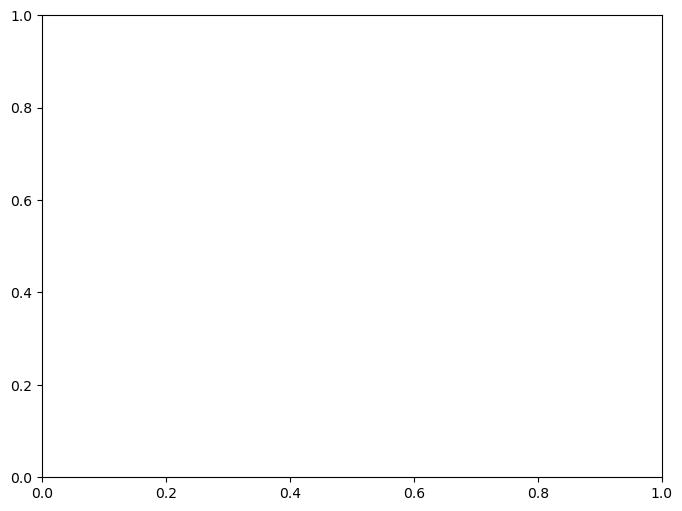

In [ ]:
mean_fwhm = np.mean(fwhm_df, axis=0)
std_fwhm = np.std(fwhm_df, axis=0)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(np.linspace(1,120,120), mean_fwhm, 'o-', label='Mean')
ax.fill_between(np.linspace(1,120,120), mean_fwhm-std_fwhm, mean_fwhm+std_fwhm, alpha=0.3, label='Std')

# makr minumum value
ax.plot(np.linspace(1,120,120)[np.argmin(mean_fwhm)], np.min(mean_fwhm), 'o', color='red', label='Min')

In [ ]:
# loop through key val pair of shalg_results
for key in shalg_results.keys():
    print(f"{key} : {shalg_results[key]['mean_fwhm']}")

### Simulated Test

In [ ]:
# Get current file folder
import os
path = os.path.abspath('')
path = os.path.join(path, "simulated_images")

simulated_images = {}
for fname in os.listdir(path):
    key = fname.split("_")[0]
    if key not in simulated_images.keys():
        simulated_images[key] = {}
    
    loaded_image = np.load(os.path.join(path, fname))
    loaded_image = loaded_image["arr_0"]
    if "uniform" in fname:
        simulated_images[key]["reference"] = loaded_image
    else:
        simulated_images[key]["simulated"] = loaded_image

In [ ]:
import importlib
import h1data as h1
import sharp as sh
import bq as bq
import pandas as pd
from skimage.metrics import structural_similarity as ssim

importlib.reload(h1)
importlib.reload(sh)
importlib.reload(bq)

shalg_results_simulated = {}
for name, alg in shalgorithms.items():
    shalg_results_simulated[name] = {}
    brisque_scores = []
    sam_scores = []
    ssim_scores = []
    for simimg in simulated_images.keys():
        print(f"Running {name}, {simimg}")

        cube = simulated_images[simimg]["simulated"]

        sbi = np.argmin(bq.scoreCube(cube, fast=True))
        cube = alg.sharpen(cube, sbi)

        brisque_scores.append(bq.scoreCube(cube, fast=True))
        sam_scores.append(sh.sam(cube, simulated_images[simimg]["reference"]))

        max_val_ssim_dr = max(
            np.max(simulated_images[simimg]["reference"]), np.max(cube))
        min_val_ssim_dr = min(
            np.min(simulated_images[simimg]["reference"]), np.min(cube))
        ssim_scores.append(
            ssim(cube, simulated_images[simimg]["reference"], 
            data_range=max_val_ssim_dr - min_val_ssim_dr))

    brisque_scores = pd.DataFrame(brisque_scores)
    mean_brisque_vector = np.mean(brisque_scores, axis=0)
    mean_brisque = np.mean(mean_brisque_vector)

    mean_sam_score = np.mean(sam_scores)
    mean_ssim_score = np.mean(ssim_scores)

    shalg_results_simulated[name]["brisque_scores_df"] = brisque_scores
    shalg_results_simulated[name]["mean_brisque_vector"] = mean_brisque_vector
    shalg_results_simulated[name]["mean_brisque"] = mean_brisque
    shalg_results_simulated[name]["sam_scores"] = sam_scores
    shalg_results_simulated[name]["mean_sam_score"] = mean_sam_score
    shalg_results_simulated[name]["ssim_scores"] = ssim_scores
    shalg_results_simulated[name]["mean_ssim_score"] = mean_ssim_score

# save results
import pickle
with open('fwhm-lsf_sim_shalg.pkl', 'wb') as f:
    pickle.dump(shalg_results_simulated, f)

In [ ]:
# loop through key val pair of shalg_results
for key in shalg_results.keys():
    print(f"{key} : {shalg_results_simulated[key]['mean_sam_score']}")